In [187]:
import numpy as n
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [111]:
def make_X(mu, sigme, size):
    X = np.random.normal(mu, sigme, size)
    return X

X1=0
X2=0

def make_data(mu, sigma, pi, size):
    global X1
    global X2
    
    sigma1 = sigma[0]
    sigma2 = sigma[1]
    mu1 = mu[0]
    mu2 = mu[1]
    pi1 = pi[0]
    pi2 = pi[1]

    X1 = make_X(mu1, sigma1, int(size*pi1))
    X2 = make_X(mu2, sigma2, int(size*pi2))
    
    X = np.vstack((X1, X2, -X1, -X2, X1, X2*-2))
    Y = np.random.randint(0,4,len(X.reshape(-1,2)))
    
    return X.reshape(-1,2), Y.reshape(-1,1)

MU1 = 50
SIGMA1 = 10
PI1 = 0.5
MU2 = -50
SIGMA2 = 2
PI2 = 1-PI1
size = 1000

X, Y = make_data((MU1, MU2), (SIGMA1, SIGMA2), (PI1, PI2), size)

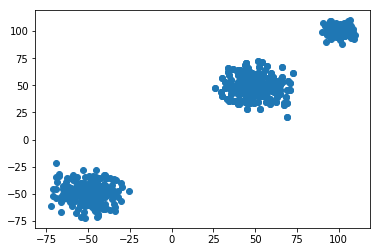

In [112]:
plt.plot(X[:,0], X[:,1], "o")
plt.show()

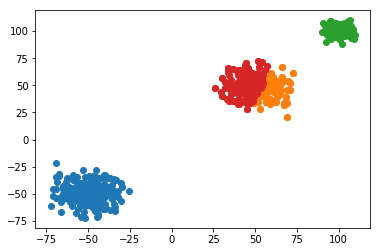

In [124]:
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(X)

labels = kmeans_model.labels_

plt.plot(X[np.where(labels==0), 0].reshape(-1), X[np.where(labels==0), 1].reshape(-1), "o")
plt.plot(X[np.where(labels==1), 0].reshape(-1), X[np.where(labels==1), 1].reshape(-1), "o")
plt.plot(X[np.where(labels==2), 0].reshape(-1), X[np.where(labels==2), 1].reshape(-1), "o")
plt.plot(X[np.where(labels==3), 0].reshape(-1), X[np.where(labels==3), 1].reshape(-1), "o")
plt.show()

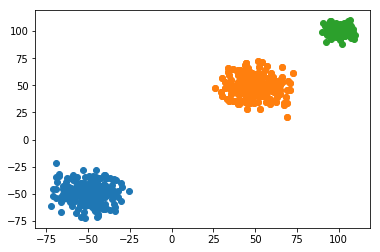

In [125]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(X)

labels = kmeans_model.labels_

plt.plot(X[np.where(labels==0), 0].reshape(-1), X[np.where(labels==0), 1].reshape(-1), "o")
plt.plot(X[np.where(labels==1), 0].reshape(-1), X[np.where(labels==1), 1].reshape(-1), "o")
plt.plot(X[np.where(labels==2), 0].reshape(-1), X[np.where(labels==2), 1].reshape(-1), "o")
plt.plot(X[np.where(labels==3), 0].reshape(-1), X[np.where(labels==3), 1].reshape(-1), "o")
plt.show()

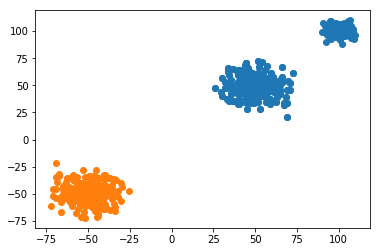

In [127]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(X)

labels = kmeans_model.labels_

plt.plot(X[np.where(labels==0), 0].reshape(-1), X[np.where(labels==0), 1].reshape(-1), "o")
plt.plot(X[np.where(labels==1), 0].reshape(-1), X[np.where(labels==1), 1].reshape(-1), "o")
plt.plot(X[np.where(labels==2), 0].reshape(-1), X[np.where(labels==2), 1].reshape(-1), "o")
plt.plot(X[np.where(labels==3), 0].reshape(-1), X[np.where(labels==3), 1].reshape(-1), "o")
plt.show()

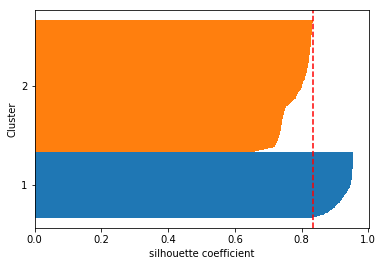

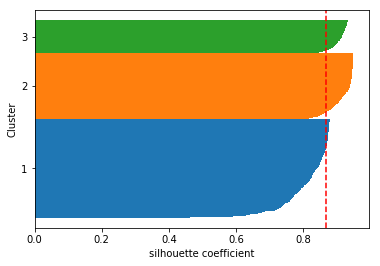

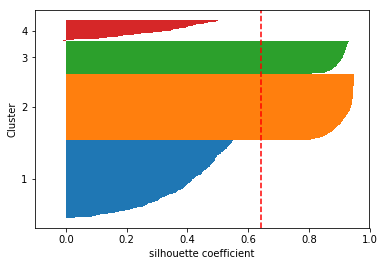

In [148]:
for i in np.arange(2,5):
    km = KMeans(n_clusters=i)
    y_km = km.fit_predict(X)

    cluster_labels = np.unique(y_km)       # y_kmの要素の中で重複を無くす
    n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

    # シルエット係数を計算
    silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
    y_ax_lower, y_ax_upper= 0,0
    yticks = []

    for i,c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
            plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                             c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                             height=1.0)                     # 棒の色
            yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
            y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

    silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
    plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
    plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
    plt.ylabel('Cluster')
    plt.xlabel('silhouette coefficient')
    plt.show()

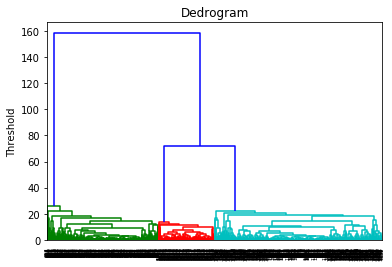

In [168]:
result1 = linkage(X, 
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  method = 'average')
                  #method= 'complete')
                  #method='weighted')
dendrogram(result1, color_threshold=60)
plt.title("Dedrogram")
plt.ylabel("Threshold")
plt.show()

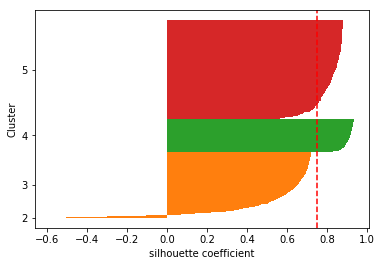

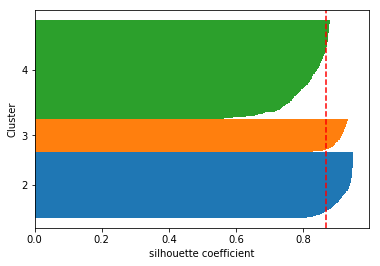

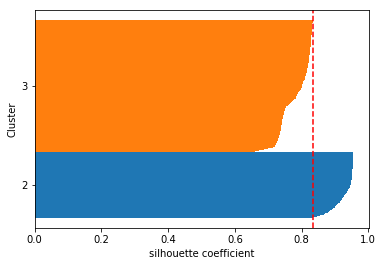

In [185]:
for i in list([25,50,75]):
    result1 = linkage(X, metric = 'euclidean', method = 'average')
    y_km = fcluster(result1, i, criterion='distance')

    cluster_labels = np.unique(y_km)       # y_kmの要素の中で重複を無くす
    n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

    # シルエット係数を計算
    silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
    y_ax_lower, y_ax_upper= 0,0
    yticks = []

    for i,c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
            plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                             c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                             height=1.0)                     # 棒の色
            yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
            y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

    silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
    plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
    plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
    plt.ylabel('Cluster')
    plt.xlabel('silhouette coefficient')
    plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

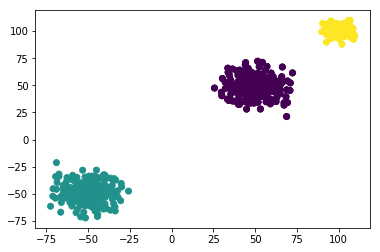

In [197]:
gmm=GaussianMixture(n_components=3,covariance_type='full')
z_gmm=gmm.fit(X)
z_gmm=z_gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1],  c=z_gmm)
plt.show

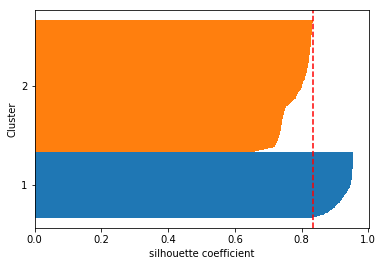

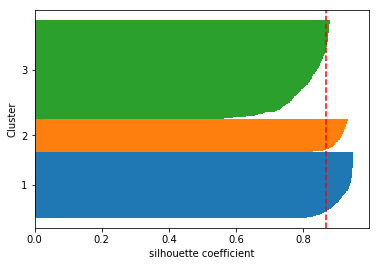

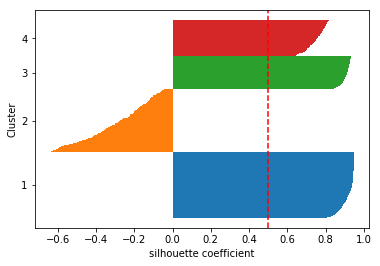

In [199]:
for i in np.arange(2,5):
    gmm=GaussianMixture(n_components=i,covariance_type='full')
    z_gmm=gmm.fit(X)
    y_km=z_gmm.predict(X)

    cluster_labels = np.unique(y_km)       # y_kmの要素の中で重複を無くす
    n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

    # シルエット係数を計算
    silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
    y_ax_lower, y_ax_upper= 0,0
    yticks = []

    for i,c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
            plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                             c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                             height=1.0)                     # 棒の色
            yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
            y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

    silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
    plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
    plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
    plt.ylabel('Cluster')
    plt.xlabel('silhouette coefficient')
    plt.show()